# Inferential Statistics - TED Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
ted_data = pd.read_csv("ted_main.csv")
#youtube_data = pd.read_csv("ted_youtube.csv")

In [3]:
ted_data.drop(['description','film_date','published_date','url'],axis=1,inplace=True)

### Mean duration of TED Talks

In [4]:
ted_data['duration'].mean()

826.5101960784314

In [5]:
min_duration_talks = ted_data[ted_data['duration']<826]
max_duration_talks = ted_data[ted_data['duration']>826]

In [6]:
import seaborn as sns
sns.boxplot((min_duration_talks['duration']/60).round(decimals=2))

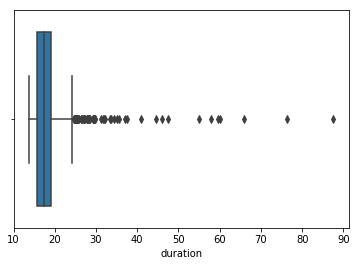

In [7]:
import seaborn as sns
sns.boxplot((max_duration_talks['duration']/60).round(decimals=2))

__Null Hypothesis - There is no difference in mean of views of minimum and maximum duration talks in TED talk
Alternate Hypothesis - There is difference in mean and Max duration views have more number of views__

In [8]:
mean_min_duration_views = min_duration_talks['views'].mean()
mean_min_duration_views

1560919.5889164598

In [9]:
mean_max_duration_views = max_duration_talks['views'].mean()
mean_max_duration_views

1822830.67539267

In [10]:
std_min_duration_views = min_duration_talks['views'].std()
std_max_duration_views = max_duration_talks['views'].std()

In [11]:
n_min = len(min_duration_talks['views'])
n_max =  len(max_duration_talks['views'])

In [12]:
std_error = np.sqrt(((std_min_duration_views)**2 / n_min) + ((std_max_duration_views)**2 / n_max) )

In [13]:
t2_statistic = (mean_min_duration_views - mean_max_duration_views)/std_error
t2_statistic

-2.7030548524943816

In [14]:
import scipy.stats as stats
t2_critical = stats.t.ppf(0.05 / 2, (len(ted_data.views)) - 2)
t2_critical

-1.960895452104842

__As t2_statistic lies within the t2_critical region we can ignore the null hypothesis. There is difference in mean__

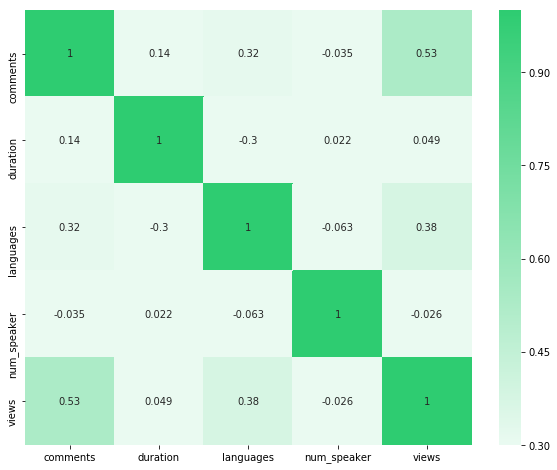

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,8))
cmap = sns.light_palette("#2ecc71", as_cmap=True)
#cmap = sns.light_palette("#2ecc71", as_cmap=True)
#sns.heatmap(ted_data[['num_speaker','ted_avlb_lang','ted_duration','ted_nof_comments','ted_views',
              #  'youtube_avg_ratings','youtube_likes','youtube_dislikes','youtube_views']].corr(),annot=True,vmin=0.3,cmap=cmap)
sns.heatmap(ted_data.corr(),annot=True,vmin=0.3,cmap=cmap)

> __Heatmap is used to find correlations between the numerical variables in Dataframe__

*  Views and Comments have a correlations of > 0.5 thats a good sign to imply relationship